In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,accuracy_score,roc_auc_score,confusion_matrix,recall_score, roc_auc_score, precision_score,precision_recall_curve,f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,StratifiedShuffleSplit
from numpy import mean, sqrt, argmax
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from sklearn import preprocessing
from sklearn.metrics import fbeta_score, make_scorer

In [2]:
df= pd.read_excel('C:/Users/anush/Desktop/Hospital Dataset/Hospital Dataset/Hospital Dataset/TrainDataSet.xlsx')
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
#Check for missing values in each column
for col in df:
    print(df[col],"\n","No of missing values:", len(df.loc[(df[col] == '?')]))

0          2278392
1           149190
2            64410
3           500364
4            16680
           ...    
69994    200032164
69995    200044230
69996    200066760
69997    200069448
69998    200078412
Name: encounter_id, Length: 69999, dtype: int64 
 No of missing values: 0
0          8222157
1         55629189
2         86047875
3         82442376
4         42519267
           ...    
69994     70288659
69995     60203502
69996     97019901
69997     57638331
69998    102604734
Name: patient_nbr, Length: 69999, dtype: int64 
 No of missing values: 0
0              Caucasian
1              Caucasian
2        AfricanAmerican
3              Caucasian
4              Caucasian
              ...       
69994          Caucasian
69995          Caucasian
69996          Caucasian
69997          Caucasian
69998          Caucasian
Name: race, Length: 69999, dtype: object 
 No of missing values: 1356
0        Female
1        Female
2        Female
3          Male
4          Male
          

In [4]:
#Replace ? with NaN for ease of processing
df= df.replace({'?':np.NaN})
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
#Since more than 90% of values are missing for the feature: weight, we will drop the column
df=df.drop(columns='weight',axis=1)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,NaN,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,NaN,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,NaN,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,NaN,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [6]:
#Since the datatype for features: diag_1,diag_2, diag_3 is "Object", we will convert it to 'int/float'
df['diag_1']= pd.to_numeric(df['diag_1'],errors='coerce')
df['diag_1'].head()

0    250.83
1    276.00
2    648.00
3      8.00
4    197.00
Name: diag_1, dtype: float64

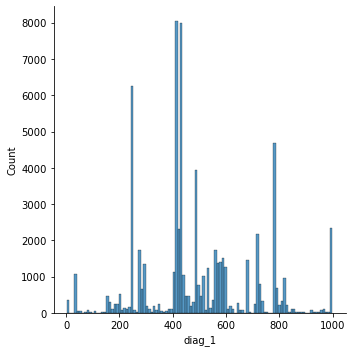

In [7]:
sns.displot(df , x="diag_1")

In [8]:
# #Since the feature: diag_1 is skewed to the right, we will fill the missing values with mean
df['diag_1'] = df['diag_1'].fillna(df['diag_1'].mean(skipna=True))
df['diag_1'].unique()

array([250.83      , 276.        , 648.        ,   8.        ,
       197.        , 414.        , 428.        , 398.        ,
       434.        , 250.7       , 157.        , 518.        ,
       999.        , 410.        , 682.        , 402.        ,
       737.        , 572.        , 493.23782323, 189.        ,
       786.        , 427.        , 996.        , 277.        ,
       584.        , 462.        , 473.        , 411.        ,
       174.        , 486.        , 998.        , 511.        ,
       432.        , 626.        , 295.        , 196.        ,
       250.6       , 618.        , 182.        , 845.        ,
       423.        , 808.        , 250.4       , 722.        ,
       403.        , 250.11      , 784.        , 707.        ,
       440.        , 151.        , 715.        , 997.        ,
       198.        , 564.        , 812.        ,  38.        ,
       590.        , 556.        , 578.        , 250.32      ,
       433.        , 569.        , 185.        , 536.  

In [9]:
df['diag_2']= pd.to_numeric(df['diag_2'],errors='coerce')
df['diag_2'].head()

0       NaN
1    250.01
2    250.00
3    250.43
4    157.00
Name: diag_2, dtype: float64

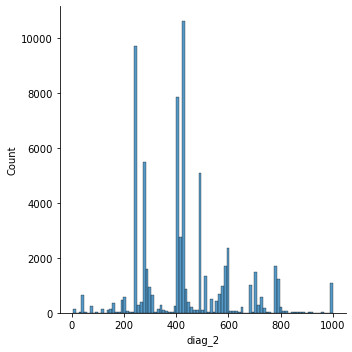

In [10]:
sns.displot(df , x="diag_2")

In [11]:
# #Since the feature: diag_2 is skewed to the right, we will fill the missing values with mean
df['diag_2'] = df['diag_2'].fillna(df['diag_2'].mean(skipna=True))
df['diag_2'].unique()

array([431.36909216, 250.01      , 250.        , 250.43      ,
       157.        , 411.        , 492.        , 427.        ,
       198.        , 403.        , 288.        , 998.        ,
       507.        , 174.        , 425.        , 456.        ,
       401.        , 715.        , 496.        , 428.        ,
       585.        , 250.02      , 410.        , 999.        ,
       996.        , 135.        , 244.        ,  41.        ,
       571.        , 276.        , 997.        , 599.        ,
       424.        , 491.        , 553.        , 707.        ,
       286.        , 440.        , 493.        , 242.        ,
        70.        , 250.03      , 357.        , 511.        ,
       196.        , 396.        , 197.        , 414.        ,
       250.52      , 577.        , 535.        , 413.        ,
       285.        ,  53.        , 780.        , 518.        ,
       150.        , 566.        , 250.6       , 867.        ,
       486.        ,   8.        , 788.        , 340.  

In [12]:
df['diag_3']= pd.to_numeric(df['diag_3'],errors='coerce')
df['diag_3'].head()

0      NaN
1    255.0
2      NaN
3    403.0
4    250.0
Name: diag_3, dtype: float64

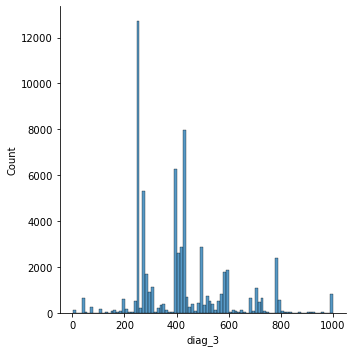

In [13]:
sns.displot(df , x="diag_3")

In [14]:
# #Since the feature: diag_2 is skewed to the right, we will fill the missing values with mean
df['diag_3'] = df['diag_3'].fillna(df['diag_3'].mean(skipna=True))
df['diag_3'].unique()

array([413.15533391, 255.        , 403.        , 250.        ,
        38.        , 486.        , 996.        , 197.        ,
       250.6       , 427.        , 627.        , 414.        ,
       416.        , 714.        , 428.        , 582.        ,
       250.01      , 263.        , 250.42      , 276.        ,
       482.        , 401.        , 250.41      , 585.        ,
       781.        , 278.        , 998.        , 568.        ,
       682.        , 618.        , 250.02      , 305.        ,
       707.        , 496.        , 599.        , 715.        ,
       424.        , 518.        , 553.        , 794.        ,
       411.        , 531.        , 511.        , 490.        ,
       562.        , 250.8       , 250.7       , 250.52      ,
       784.        , 491.        , 581.        , 420.        ,
         8.        , 724.        , 730.        , 789.        ,
       131.        , 250.82      , 999.        ,  41.        ,
       493.        , 250.03      , 753.        , 786.  

In [15]:
#Fill the missing values in column: race with its mode
catg_columns= ['race','payer_code','medical_specialty']
for column in catg_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [16]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [17]:
#Fill the missing values in column: gender with its mode
df['gender']= df['gender'].replace({'Unknown/Invalid':df['gender'].mode().iloc[0]})
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,MC,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [18]:
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [19]:
#Replace range values with their mean
df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

In [20]:
df['age']=df['age'].replace('\[','',regex=True)
df['age']=df['age'].replace('\)','',regex=True)
df['age'].unique()

array(['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70',
       '70-80', '80-90', '90-100'], dtype=object)

In [21]:
def split_mean(x):
    split_list = x.split('-')
    mean = (float(split_list[0])+float(split_list[1]))/2
    return mean
df['age'] = df['age'].apply(lambda x: split_mean(x))
df['age']

0         5.0
1        15.0
2        25.0
3        35.0
4        45.0
         ... 
69994    55.0
69995    45.0
69996    65.0
69997    95.0
69998    75.0
Name: age, Length: 69999, dtype: float64

In [22]:
df.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5.0,6,25,1,1,MC,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,15.0,1,1,7,3,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
2,64410,86047875,AfricanAmerican,Female,25.0,1,1,7,2,MC,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,35.0,1,1,7,2,MC,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,45.0,1,1,7,1,MC,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
#Apply Label Encoder across variables with categorical data
column_list_le= ['race', 'gender', 'payer_code','medical_specialty','metformin','repaglinide','nateglinide','chlorpropamide',
'glimepiride','acetohexamide','glipizide','glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol',
'troglitazone','tolazamide','examide','citoglipton','insulin','glyburide-metformin','glipizide-metformin',
'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone','change','diabetesMed','readmitted',
'max_glu_serum','A1Cresult']
column_list_le

['race',
 'gender',
 'payer_code',
 'medical_specialty',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide-metformin',
 'glipizide-metformin',
 'glimepiride-pioglitazone',
 'metformin-rosiglitazone',
 'metformin-pioglitazone',
 'change',
 'diabetesMed',
 'readmitted',
 'max_glu_serum',
 'A1Cresult']

In [24]:
le = LabelEncoder()
df[column_list_le] = df[column_list_le].apply(LabelEncoder().fit_transform)

In [25]:
df.head(10)

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,2,0,5.0,6,25,1,1,6,...,0,1,1,0,0,0,0,1,0,0
1,149190,55629189,2,0,15.0,1,1,7,3,6,...,0,3,1,0,0,0,0,0,1,0
2,64410,86047875,0,0,25.0,1,1,7,2,6,...,0,1,1,0,0,0,0,1,1,0
3,500364,82442376,2,1,35.0,1,1,7,2,6,...,0,3,1,0,0,0,0,0,1,0
4,16680,42519267,2,1,45.0,1,1,7,1,6,...,0,2,1,0,0,0,0,0,1,0
5,35754,82637451,2,1,55.0,2,1,2,3,6,...,0,2,1,0,0,0,0,1,1,0
6,55842,84259809,2,1,65.0,3,1,2,4,6,...,0,2,1,0,0,0,0,0,1,0
7,63768,114882984,2,1,75.0,1,1,7,5,6,...,0,1,1,0,0,0,0,1,1,0
8,12522,48330783,2,0,85.0,2,1,4,13,6,...,0,2,1,0,0,0,0,0,1,0
9,15738,63555939,2,0,95.0,3,3,4,12,6,...,0,2,1,0,0,0,0,0,1,0


In [26]:
X= df.drop('readmitted',axis=1).copy() #Alternative: X= df_no_missing.iloc[:,:-1]
y= df['readmitted'].copy()
X,y

(       encounter_id  patient_nbr  race  gender   age  admission_type_id  \
 0           2278392      8222157     2       0   5.0                  6   
 1            149190     55629189     2       0  15.0                  1   
 2             64410     86047875     0       0  25.0                  1   
 3            500364     82442376     2       1  35.0                  1   
 4             16680     42519267     2       1  45.0                  1   
 ...             ...          ...   ...     ...   ...                ...   
 69994     200032164     70288659     2       1  55.0                  1   
 69995     200044230     60203502     2       1  45.0                  3   
 69996     200066760     97019901     2       1  65.0                  1   
 69997     200069448     57638331     2       1  95.0                  1   
 69998     200078412    102604734     2       1  75.0                  3   
 
        discharge_disposition_id  admission_source_id  time_in_hospital  \
 0         

In [27]:
#Normalize the data
scaler = preprocessing.MinMaxScaler()
names = df.columns
X[['encounter_id','patient_nbr','age','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','discharge_disposition_id']] = scaler.fit_transform(X[['encounter_id','patient_nbr','age','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','discharge_disposition_id']])
X[['encounter_id','patient_nbr','age','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','discharge_disposition_id']]= X[['encounter_id','patient_nbr','age','num_lab_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','diag_1','diag_2','diag_3','discharge_disposition_id']].round(3)
X.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
0,0.011,0.071,2,0,0.000,6,0.889,1,1,6,...,0,0,1,1,0,0,0,0,1,0
1,0.001,0.483,2,0,0.111,1,0.000,7,3,6,...,0,0,3,1,0,0,0,0,0,1
2,0.000,0.747,0,0,0.222,1,0.000,7,2,6,...,0,0,1,1,0,0,0,0,1,1
3,0.002,0.716,2,1,0.333,1,0.000,7,2,6,...,0,0,3,1,0,0,0,0,0,1
4,0.000,0.369,2,1,0.444,1,0.000,7,1,6,...,0,0,2,1,0,0,0,0,0,1


<AxesSubplot:>

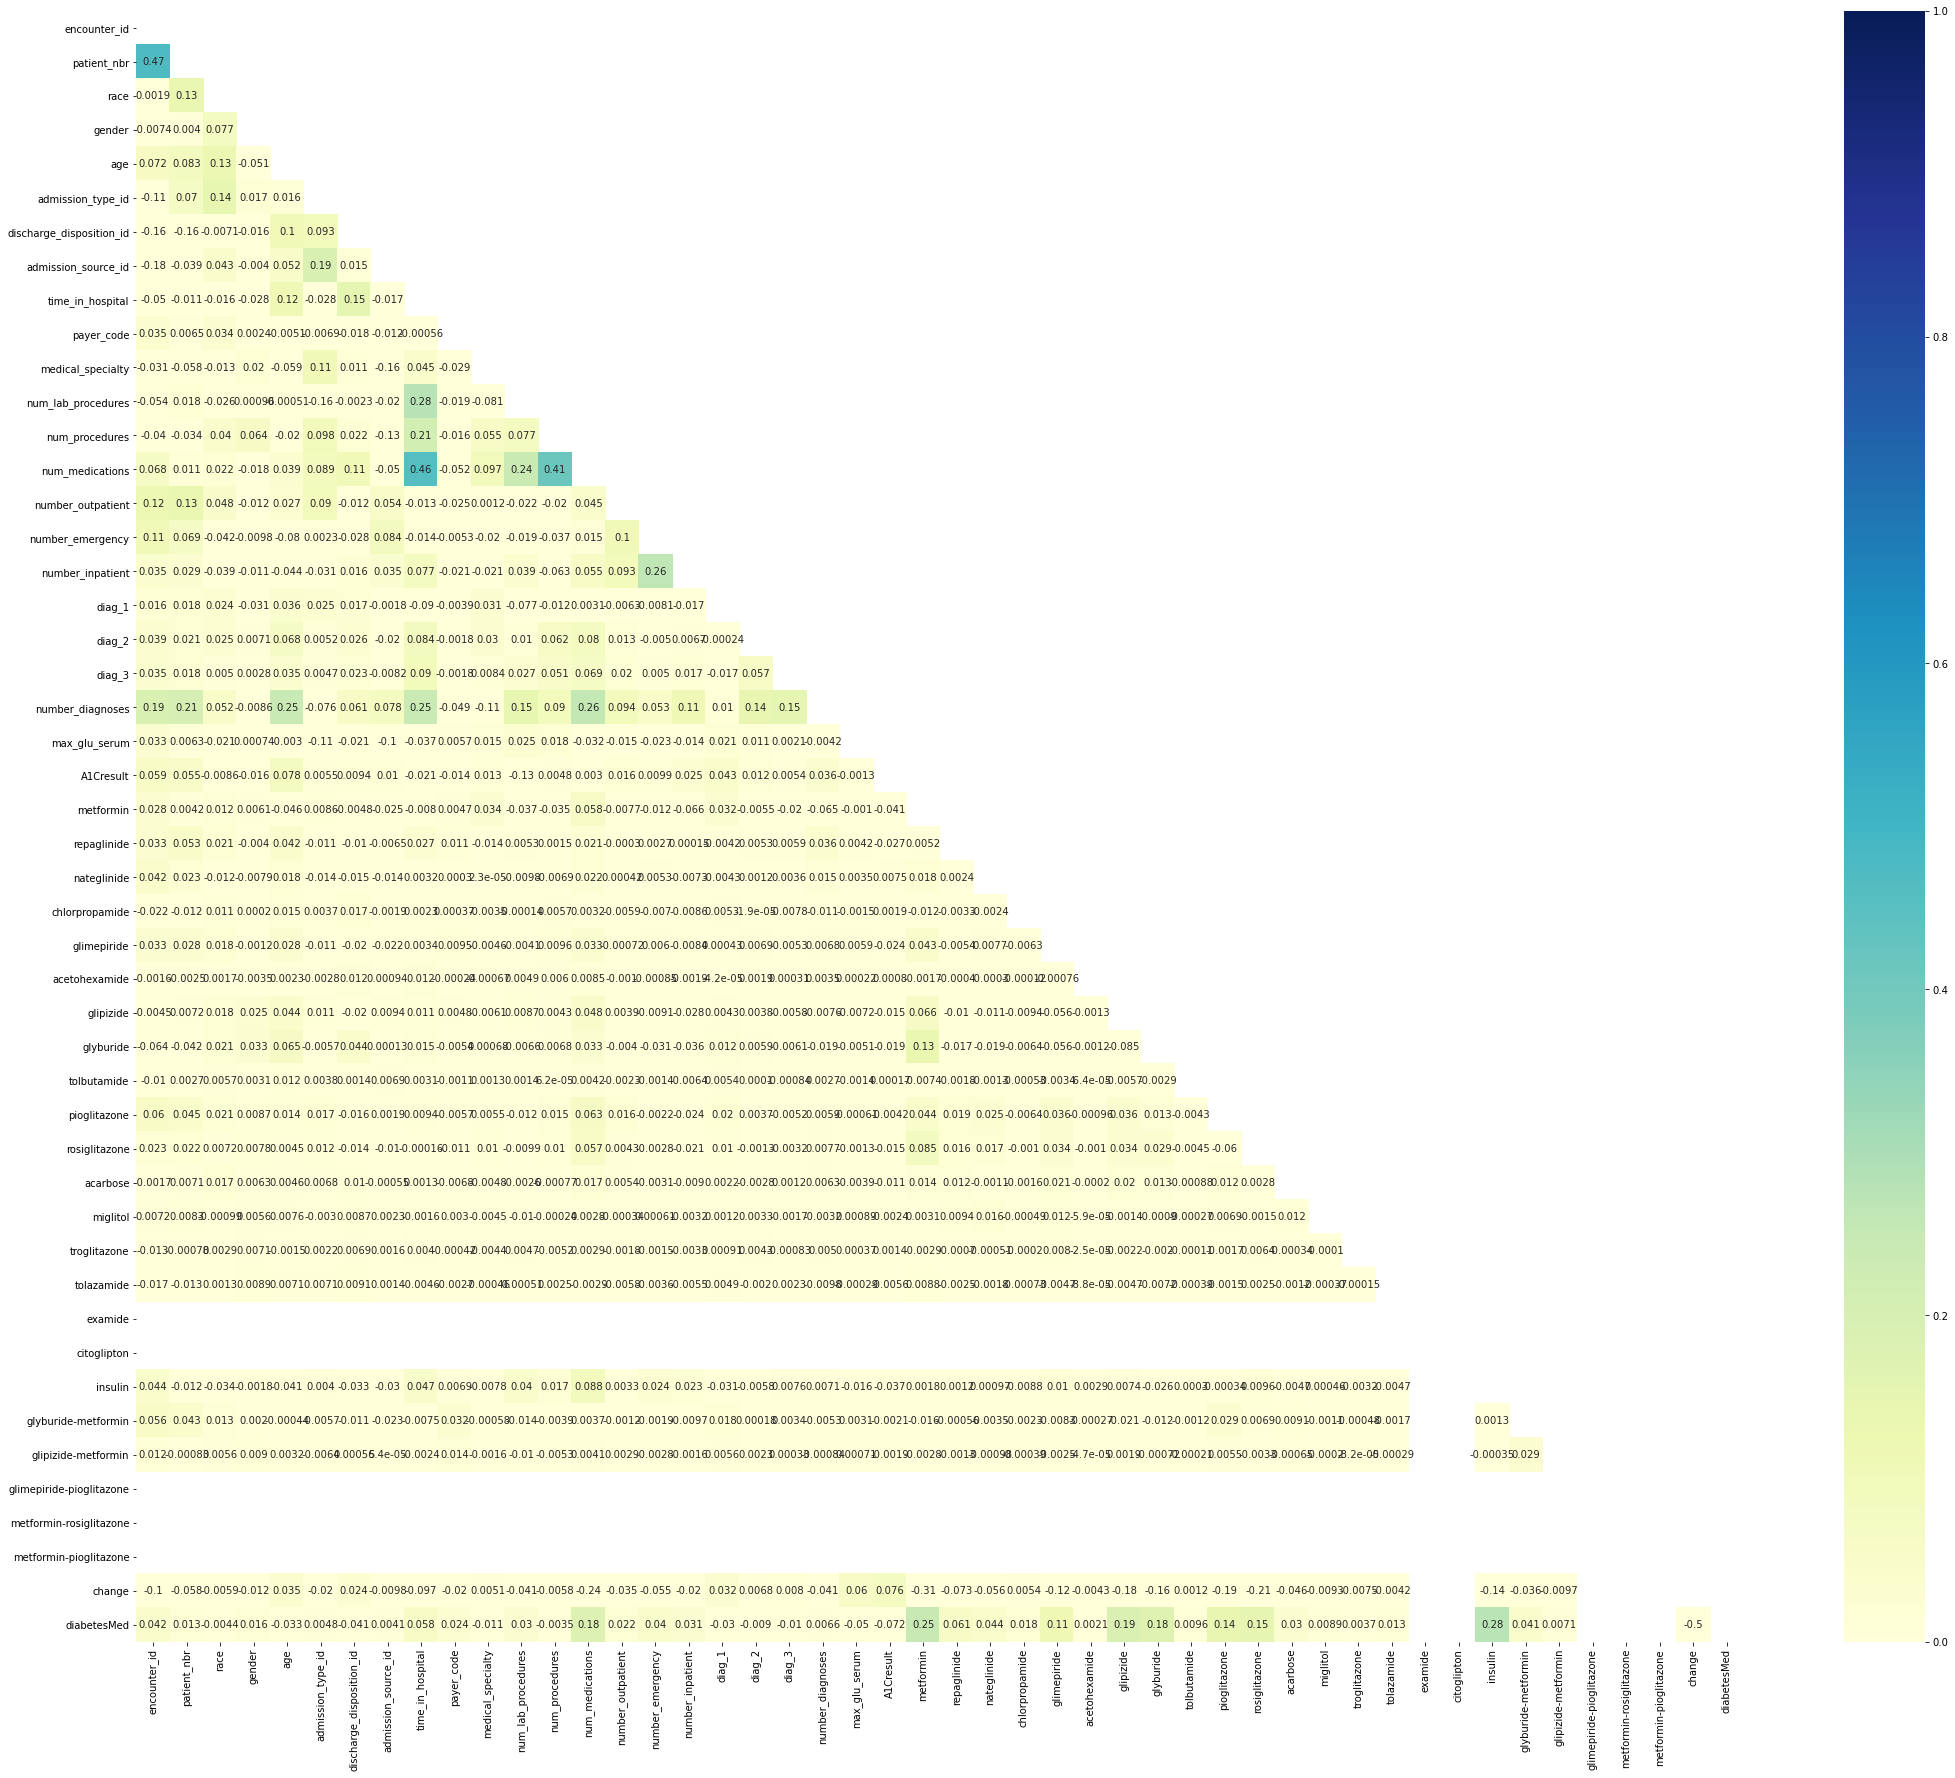

In [28]:
corr = X.corr()
f, ax = plt.subplots(figsize=(36,30))
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Configure a custom diverging colormap
# cmap = sns.diverging_palette(200, 10, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, mask=mask, cmap="YlGnBu",vmin=0, vmax=1,xticklabels=1, yticklabels=1)

In [29]:
#dropping features with correlation>0.5
#Since there are no columns with correlation>0.5, we will not drop any columns and conclude that there is no multicollinearity in this model
cor_matrix = X.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.5)]
print(to_drop)

[]


In [67]:
#applying stratification to get 10% of the data
ss = StratifiedShuffleSplit(n_splits=1, train_size=0.1, random_state=50)
for train_index, test_index in ss.split(X, y):
    trainX, trainY = X.loc[train_index], y.loc[train_index]
trainX.shape,trainY.shape

((6999, 48), (6999,))

In [68]:
X_train, X_test, y_train, y_test= train_test_split(trainX,trainY,test_size=0.25)

In [69]:
model= LogisticRegression(max_iter=10000000,solver='liblinear')
Init_Model = model.fit(X_train,y_train)

In [70]:
pred_values = model.predict(X_test)

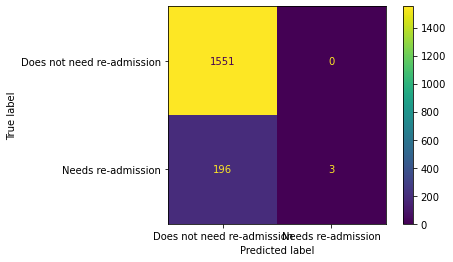

In [71]:
#True negatives are much greater than true positives, hence the model is skewed
#For a hospital re-admission, since the number of false negatives is more important than the no. of false positives,
#we have to adjust the model so the no. of false negatives can be increased.
plot_confusion_matrix(model,X_test,y_test,display_labels=["Does not need re-admission", "Needs re-admission"])

In [72]:
#For our model, since False negatives are more costly, we used F2 score 
f2 = fbeta_score(y_test, pred_values, beta=2.0)
f2

0.018773466833541926

In [73]:
def f2_func(y_test, pred_values):
    f2_score = fbeta_score(y_test, pred_values, beta=2.0)
    return f2_score

def my_f2_scorer():
    return make_scorer(f2_func)

In [74]:
#Grid Search for finding the best 'C' value
w0= np.linspace(0.01,1,100)
alpha_vals= np.linspace(0.01,50,100)
param_grid = {'class_weight': [{0: x, 1:1-x} for x in w0],'C':[x for x in alpha_vals]}
gridsearch = GridSearchCV(estimator= model, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(n_splits=2), 
                          n_jobs=-1, 
                          scoring=my_f2_scorer(), 
                          verbose=2).fit(X_train, y_train)
result= gridsearch.fit(X_train, y_train)

Fitting 2 folds for each of 10000 candidates, totalling 20000 fits
Fitting 2 folds for each of 10000 candidates, totalling 20000 fits


In [75]:
# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))

Best: 0.397743 using {'C': 2.0297979797979795, 'class_weight': {0: 0.09, 1: 0.91}}


In [76]:
alpha= result.best_params_['C']
alpha

2.0297979797979795

In [77]:
weight= result.best_params_['class_weight']
weight

{0: 0.09, 1: 0.91}

In [78]:
Tuned_Model= LogisticRegression(max_iter=1000000,solver='liblinear',class_weight= weight, penalty='l1',C=alpha)
Tuned_Model= Tuned_Model.fit(X_train, y_train)
pred_values_up= Tuned_Model.predict(X_test)

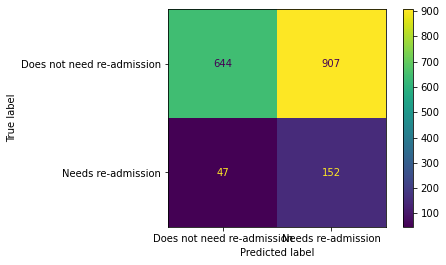

In [79]:
plot_confusion_matrix(Tuned_Model,X_test,y_test,display_labels=["Does not need re-admission", "Needs re-admission"])

In [80]:
f2_new = fbeta_score(y_test, pred_values_up,beta=2.0)
f2_new

0.4097035040431267

In [81]:
rfe = RFE(Tuned_Model, n_features_to_select= None)
rfe = rfe.fit(X_train, y_train)

In [82]:
#Summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)
X_train.columns[rfe.support_]

[False  True False  True  True False  True False False False False  True
  True  True False False  True  True  True  True  True  True  True  True
 False False  True  True False  True  True False  True  True  True False
 False False False False False  True False False False False  True False]
[ 2  1  8  1  1  7  1  3  5  6  9  1  1  1 25 12  1  1  1  1  1  1  1  1
 24 18  1  1 22  1  1 14  1  1  1 11 23 21 20 13 10  1 19 15 16 17  1  4]


Index(['patient_nbr', 'gender', 'age', 'discharge_disposition_id',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'chlorpropamide',
       'glimepiride', 'glipizide', 'glyburide', 'pioglitazone',
       'rosiglitazone', 'acarbose', 'glyburide-metformin', 'change'],
      dtype='object')

In [83]:
RFE_Model= Tuned_Model.fit(X_train[X_train.columns[rfe.support_]], y_train)
y_pred_rfe = Tuned_Model.predict(X_test[X_train.columns[rfe.support_]])
f2_rfe = fbeta_score(y_test, y_pred_rfe, beta=2.0)
f2_rfe

0.3873050026896181

In [84]:
confusion_matrix(y_test, y_pred_rfe)

array([[632, 919],
       [ 55, 144]], dtype=int64)

Best Threshold=0.455495, F2-Score=0.414


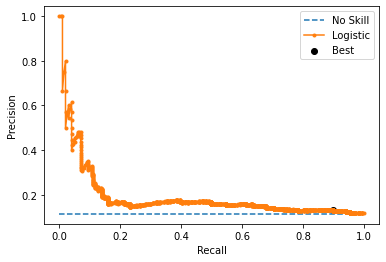

In [85]:
yhat = RFE_Model.predict_proba(X_test[X_train.columns[rfe.support_]])
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# # calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
precision= precision.round(3)
recall= recall.round(3)
# convert to f score
f2score = (5 * precision * recall)/(4 * precision + recall)
f2score = f2score[~np.isnan(f2score)]
# locate the index of the largest f score
ix = argmax(f2score)
print('Best Threshold=%f, F2-Score=%.3f' % (thresholds[ix], f2score[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()

In [86]:
THRESHOLD = thresholds[ix]
decisions = (RFE_Model.predict_proba(X_test[X_train.columns[rfe.support_]])[:,1] >= THRESHOLD).astype(int)

In [87]:
pd.DataFrame(data=[fbeta_score(y_test, decisions, beta=2.0),recall_score(y_test, decisions),
                   precision_score(y_test, decisions)], 
             index=["f2 score", "recall", "precision"])

,0
f2 score,0.413013
recall,0.899497
precision,0.130562


In [88]:
confusion_matrix(y_test, decisions)

array([[ 359, 1192],
       [  20,  179]], dtype=int64)